In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!pip uninstall tensorflow -y

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


In [41]:
!pip install tensorflow==2.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tensorflow-2.8.0-cp310-cp310-manylinux2010_x86_64.whl (497.6 MB)


In [42]:
#1 DATA STUDY
#1º Import dataset
import pandas as pd

path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
df = pd.read_csv(path)
print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1) #For now, just drop NA's (rows with missing values)
print("COLUMNS")
print(df.columns)

Read 82332 rows.
COLUMNS
Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [43]:
#2º Study of datasets

import numpy as np
#Copy df to modify it
df_dataset=df
#Divide into two different datasets to study them
if 'attack_cat' in df_dataset.columns:
  df_labels=df_dataset["attack_cat"]
  df_dataset=df_dataset.drop("attack_cat", axis=1)
if 'label' in df_dataset.columns:
  df_ataqueBinario=df_dataset["label"]
  df_dataset=df_dataset.drop("label", axis=1)
print(df_dataset.columns)
print(df_labels)

#To study each feature
print("COLUMNS: Features")
i=0;
for t in df.dtypes.tolist():
  print(i, t)
  i+=1

#Number of columns
#print (df.shape[1])
print("DATASET")
print(df_dataset.shape[1])

#Types of attacks
AttackTypes = np.unique(df_labels)
print("TYPES OF ATTACKS")
print(AttackTypes)

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')
0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 82332, dtype: object
COLUMNS: Features
0 int64
1 float64
2 object
3 object
4 object
5 int64
6 int64
7 int64
8 int64
9 float64
10 int64
11 int64
12 float64
13 float64
14 int64
15 int64
16 float64
17 float64
18 float64
19 float6


82332 rows
** id:82332 (100%)
** dur:39888 (48%)
** proto:131 (0%)
** service:[-:57.27%,dns:25.95%,http:10.07%,smtp:2.25%,ftp:1.89%,ftp-data:1.7%,pop3:0.51%,ssh:0.25%,ssl:0.04%,snmp:0.04%,dhcp:0.03%,radius:0.01%,irc:0.01%]
** state:[FIN:47.78%,INT:41.49%,CON:8.48%,REQ:2.24%,ACC:0.0%,RST:0.0%,CLO:0.0%]
** spkts:420 (0%)
** dpkts:436 (0%)
** sbytes:4489 (5%)
** dbytes:4034 (4%)
** rate:40616 (49%)
** sttl:[254:65.65%,31:20.29%,62:12.6%,0:1.27%,29:0.06%,1:0.05%,255:0.03%,60:0.03%,32:0.02%,30:0.0%,63:0.0%]
** dttl:[0:43.81%,252:35.56%,29:20.24%,60:0.27%,30:0.05%,31:0.04%,253:0.01%,32:0.0%]
** sload:42873 (52%)
** dload:40614 (49%)
** sloss:253 (0%)
** dloss:311 (0%)
** sinpkt:39970 (48%)
** dinpkt:37617 (45%)
** sjit:39944 (48%)
** djit:38381 (46%)
** swin:[255:52.33%,0:47.66%,156:0.0%,202:0.0%,99:0.0%,5:0.0%,67:0.0%,154:0.0%,52:0.0%,245:0.0%,43:0.0%]
** stcpb:39219 (47%)
** dtcpb:39108 (47%)
** dwin:[255:50.3%,0:49.68%,27:0.0%,81:0.0%,160:0.0%,77:0.0%,171:0.0%,137:0.0%,164:0.0%,33:0.0%,2

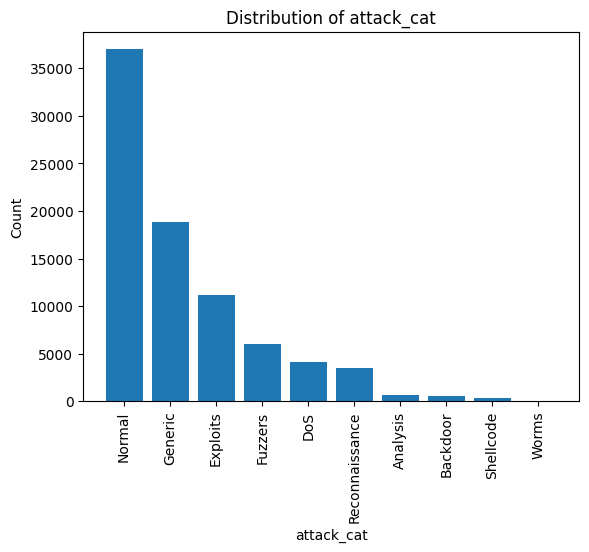

In [44]:
#3º Study of concepts
import pandas as pd
import os
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
df = pd.read_csv(path)
#print("Read {} rows.".format(len(df)))
df.dropna(inplace=True,axis=1)

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))

def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,\
                int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

    #Filter only the attacks
    col = "attack_cat"

    uniques = df[col].unique()
    unique_count = len(uniques)
    if unique_count > 100:
        print("** {}:{} ({}%)".format(col, unique_count, int((unique_count / total) * 100)))
    else:
        print("** {}:{}".format(col, expand_categories(df[col])))
        category_counts = df[col].value_counts()

        # Graph
        fig, ax = plt.subplots()
        ax.bar(category_counts.index, category_counts.values)

        # Adjust axis x
        plt.xticks(rotation=90)

        #Show and plot graph
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title('Distribution of {}'.format(col))
        plt.show()
analyze(df)

In [45]:
#4º Further study of features for concept selection
proto_counts=df["proto"].value_counts()
used_proto_types = proto_counts.sort_values(ascending=False)#mayor menor
for proto, count in used_proto_types.items():
  print(proto, ',', count)

#Dur -> Threshold
dur_stat=df["dur"].describe()
print(dur_stat)

threshold=0.001
events=df[df['dur'] < threshold]
attacks = events[events['attack_cat'] != 'Normal']
normal = df[(df['dur'] < threshold) & (df['attack_cat'] == 'Normal')]
num_attacks = attacks.shape[0]
num_normal = normal.shape[0]
print("N events", len(events))
print("N attacks", num_attacks)
print("N normal", num_normal)

normal_events=df[df['dur'] > threshold]
normal_attacks = normal_events[normal_events['attack_cat'] != 'Normal']
normal_normal = df[(df['dur'] > threshold) & (df['attack_cat'] == 'Normal')]
num_normal_attacks = normal_attacks.shape[0]
num_normal_normal = normal_normal.shape[0]
print("N events", len(normal_events))
print("N attacks", num_normal_attacks)
print("N normal", num_normal_normal)

tcp , 43095
udp , 29418
unas , 3515
arp , 987
ospf , 676
sctp , 324
any , 96
gre , 88
rsvp , 64
ipv6 , 61
sep , 58
sun-nd , 54
pim , 52
mobile , 52
swipe , 52
leaf-1 , 34
xns-idp , 34
bbn-rcc , 34
prm , 34
ipnip , 33
pup , 33
dcn , 33
hmp , 33
mux , 33
xnet , 33
egp , 33
emcon , 33
trunk-1 , 33
chaos , 33
argus , 33
st2 , 33
netblt , 33
ip , 33
ggp , 33
cbt , 33
nvp , 33
trunk-2 , 33
irtp , 33
iso-tp4 , 33
leaf-2 , 33
rdp , 33
igp , 33
ddp , 32
idpr , 32
3pc , 32
sat-mon , 32
merit-inp , 32
mfe-nsp , 32
ippc , 32
tp++ , 32
idpr-cmtp , 32
i-nlsp , 32
sdrp , 32
ipv6-frag , 32
ipv6-route , 32
idrp , 32
mhrp , 32
rvd , 32
narp , 32
skip , 32
tlsp , 32
kryptolan , 32
wsn , 32
cpnx , 32
gmtp , 32
ipv6-opts , 32
pvp , 32
br-sat-mon , 32
wb-mon , 32
vmtp , 32
ttp , 32
nsfnet-igp , 32
dgp , 32
eigrp , 32
tcf , 32
sprite-rpc , 32
larp , 32
mtp , 32
ax.25 , 32
ipip , 32
aes-sp3-d , 32
micp , 32
encap , 32
pri-enc , 32
ipv6-no , 32
ptp , 32
cftp , 32
sat-expak , 32
iplt , 32
pipe , 32
sps , 32
qnx

In [47]:
pip install tcav

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
# Necessary because jupyter restricts relative imports from parent directories
import os
if os.getcwd().split('/')[-1] != 'tcav':
    print(os.getcwd())
    os.chdir('../')
    os.chdir('../')
    os.chdir('../')
    print(os.getcwd())

/
/


In [49]:
from tensorflow.io import gfile
from tcav.utils import create_session

# 1º Make source directory para las siguientes operaciones
!rm -rf ./tcav/tcav_examples/discrete/unsw_sanity2/* #errase previous data
source_dir = "./tcav/tcav_examples/discrete/unsw_sanity2"
working_dir = source_dir

acts_dir = os.path.join(working_dir, "activations")#path inside working_dir
gfile.makedirs(acts_dir) #create dir

cav_dir = os.path.join(working_dir, "cav")
gfile.makedirs(cav_dir)

!ls ./tcav/tcav_examples/discrete/unsw_sanity2/

activations  cav


In [52]:
#2 MAKE CONCEPTS
import pandas as pd
import argparse
from tensorflow.io import gfile
import os

def make_concepts_targets_and_randoms(source_dir):

  path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1)

  #1º CONCEPT DEFINITION AND FOLDERS
  # Make concept folders with the csv files
  def make_concept_folder(df, concept):
    # Create the folder and save the dataframe as a csv file there
    path = os.path.join(source_dir, concept)
    if not gfile.exists(path):
      gfile.makedirs(path)

    concept_file_name = os.path.join(path, concept + ".csv")
    df.to_csv(concept_file_name, index=False)

  """concept_true = df[df["is_sm_ips_ports"] == 1]
  concept_false = df[df["is_sm_ips_ports"] == 0]

  make_concept_folder(concept_true,
                      "is_sm_ips_ports_true")
  make_concept_folder(concept_false,
                      "is_sm_ips_ports_false)"""
  #PROTOCOL BASED CONCEPTS: TCP, UDP, ICMP
  tcp_df = df[df["proto"] == "tcp"]
  udp_df = df[df["proto"] == "udp"]
  make_concept_folder(tcp_df, "protocol_tcp")
  make_concept_folder(udp_df, "protocol_udp")
  #SERVICE TYPES CONCEPTS
  dns_df = df[df["service"] == "dns"]
  http_df = df[df["service"] == "http"]
  make_concept_folder(dns_df, "service_dns")
  make_concept_folder(http_df, "service_http")
  """#CONNECTION DURATION CONCEPTS
  umbral=0.001
  short_dur_df = df[df["dur"] > umbral]
  long_dur_df = df[df["dur"] < umbral]
  make_concept_folder(short_dur_df, "duration_short")
  make_concept_folder(long_dur_df, "duration_long")"""
  #ESTADO CONEXIONES CONCEPTS
  fin_df = df[df["state"] == "FIN"] #finished
  int_df = df[df["state"] == "INT"] #intermediate
  con_df = df[df["state"] == "CON"] #stablished
  req_df = df[df["state"] == "REQ"] #required
  make_concept_folder(fin_df, "state_fin")
  make_concept_folder(int_df, "state_int")
  make_concept_folder(con_df, "state_con")
  make_concept_folder(req_df, "state_req")
  #TIME TO LIVE
  #STTL: from src
  big_df = df[df["sttl"] == 254]
  small_df = df[df["sttl"] == 31]
  medium_df = df[df["sttl"] == 62]
  make_concept_folder(big_df, "sttl_big")
  make_concept_folder(small_df, "sttl_small")
  make_concept_folder(medium_df, "sttl_medium")
  #DTTL: to dst
  null_df = df[df["dttl"] == 0]
  big_df = df[df["dttl"] == 252]
  medium_df = df[df["dttl"] == 29]
  make_concept_folder(null_df, "dttl_null")
  make_concept_folder(big_df, "dttl_big")
  make_concept_folder(medium_df, "dttl_medium")
  #CONCEPTS
  concepts_protocol=["protocol_tcp", "protocol_udp"]
  concepts_service=["service_dns",  "service_http"]
  """concepts_dur=["duration_short", "duration_long"]"""
  concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
  concepts_sttl=["sttl_big",  "sttl_small"]
  concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]
  #Print
  print("Available concepts for UNSW_NB15 dataset are: ")
  #print(["is_sm_ips_ports_true","is_sm_ips_ports_false"])
  print(concepts_protocol)
  print(concepts_service)
  """print(concepts_dur)"""
  print(concepts_state)
  print(concepts_sttl)
  print(concepts_dttl)
  print("\n")

  #2º MAKE RANDOM EXAMPLES
  # Making random_examples
  random_size = 10
  random_partitions = 11
  for i in range(random_partitions):
    random_partition_name = "random500_" + str(i)
    randoms = df.sample(random_size)
    make_concept_folder(randoms, random_partition_name)
  print("Created 10 random folders \n")

  #3º MAKE LABELS.TXT WITH ALL ATTACK TYPES
  # Make target folder
  targets = df.attack_cat.unique()
  print("Available targets for UNSW_NB15 dataset are: ")
  print(targets)
  print("\n")
  for target in targets:
    target_df = df[df["attack_cat"] == target]
    make_concept_folder(target_df, target)
  # make labels
  with open(os.path.join(source_dir, "labels.txt"), "w") as the_file:
    for target in targets:
      the_file.write(target + "\n")

#4º IMPLEMENT FUNCTION
if not gfile.exists(source_dir):
  gfile.makedirs(os.path.join(source_dir))
  print("Created source directory at " + source_dir)
# Make data
!rm -rf ./tcav/tcav_examples/discrete/unsw_sanity2/*
make_concepts_targets_and_randoms(source_dir)
print("Successfully created data at " + source_dir)
!ls ./tcav/tcav_examples/discrete/unsw_sanity2/

Available concepts for UNSW_NB15 dataset are: 
['protocol_tcp', 'protocol_udp']
['service_dns', 'service_http']
['state_fin', 'state_int', 'state_con', 'state_req']
['sttl_big', 'sttl_small']
['dttl_null', 'dttl_big', 'dttl_medium']


Created 10 random folders 

Available targets for UNSW_NB15 dataset are: 
['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']


Successfully created data at ./tcav/tcav_examples/discrete/unsw_sanity2
Analysis     Generic	   random500_2	Reconnaissance	sttl_big
Backdoor     labels.txt    random500_3	service_dns	sttl_medium
DoS	     Normal	   random500_4	service_http	sttl_small
dttl_big     protocol_tcp  random500_5	Shellcode	Worms
dttl_medium  protocol_udp  random500_6	state_con
dttl_null    random500_0   random500_7	state_fin
Exploits     random500_1   random500_8	state_int
Fuzzers      random500_10  random500_9	state_req


In [53]:
#Verify labels
with open("./tcav/tcav_examples/discrete/unsw_sanity2/labels.txt", "r") as file:
    content = file.read()
    print(content)
print(df_labels.unique())
print(type(df_labels))
print(type(content))

Normal
Reconnaissance
Backdoor
DoS
Exploits
Analysis
Fuzzers
Worms
Shellcode
Generic

['Normal' 'Reconnaissance' 'Backdoor' 'DoS' 'Exploits' 'Analysis'
 'Fuzzers' 'Worms' 'Shellcode' 'Generic']
<class 'pandas.core.series.Series'>
<class 'str'>


In [54]:
#3 CREATE MODEL

from __future__ import division
from __future__ import print_function
import os
import tensorflow as tf
import argparse
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn.datasets
from sklearn.preprocessing import OrdinalEncoder

# Types of the columns in the dataset
kFloatIndices = [1, 9, 12, 13, 16, 17, 18, 19, 24, 25, 26]
kIntIndices = [
    0, 5, 6, 7, 8, 10, 11, 14, 15, 20, 21, 22, 23, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42
]
kBytesIndices = [2, 3, 4]

#1º PRE-PROCESS DATASET
def encode_variables(data):
  #Encodes categorical variables with Ordinal Encoding
  data2 = np.copy(data)#independent copy
  encoder = OrdinalEncoder()
  categorical_indices = kBytesIndices
  data2[:,
        categorical_indices] = encoder.fit_transform(data2[:,
                                                           categorical_indices])
  return data2

def encoding_function(x, label_path):
  #Matches a label's name with the index from the labels.txt file
  # Open label file and get indices
  with tf.io.gfile.GFile(label_path, 'r') as f:
    labels = [l.strip().split(' ')[0] for l in f.readlines()]
  return labels.index(x)

def encode_labels(labels, label_path):
  #Encoding labels according to order in the labels file, so it is compliant with ModelWrapper
  labels2 = np.copy(labels)
  encoded = [encoding_function(x, label_path) for x in labels2]
  return encoded

def create_categorical_map(data):
  categorical_indices = kBytesIndices
  # Takes form {index : number of unique values}
  categorical_map = {}
  for index in categorical_indices:
    categorical_map[index] = np.unique(data[:, [index]]).shape[0]
  return categorical_map


def prepare_dataset(labels_path):
  path="/content/drive/MyDrive/Colab_Notebooks/UNSW-NB15/UNSW_NB15_training-set.csv"
  df = pd.read_csv(path)
  df.dropna(inplace=True,axis=1)
  df_dataset=df
  if 'attack_cat' in df_dataset.columns:
    df_labels=df_dataset["attack_cat"]
    df_dataset=df_dataset.drop("attack_cat", axis=1)
  if 'label' in df_dataset.columns:
    df_dataset=df_dataset.drop("label", axis=1)

  data = np.array(df_dataset)
  labels = np.array(df_labels)
  encoded_data = encode_variables(data)
  encoded_labels = encode_labels(labels, labels_path)
  return encoded_data, encoded_labels

#2º CREATE MODEL
#Simple feedforward model with embedding representation for categorical variables
def make_keras_model(categorical_map):
  n_features = 43
  n_labels = 10
  # Make all placeholders
  inputs = []
  models = []

  input_layer = tf.keras.layers.Input(shape=(n_features,), name='input')
  inputs.append(input_layer)
  # Splits the input vector into multiple variables
  deconcat = tf.split(input_layer, [1 for i in range(n_features)], 1)
  for index in range(n_features):
    # For categorical variables, we create embedding layers
    if index in categorical_map.keys():
      vocab_size = categorical_map[index]
      inpt = deconcat[index]
      inputs.append(inpt)
      embed = tf.keras.layers.Embedding(vocab_size, 200, \
                                        trainable=True,
                                        embeddings_initializer=tf.compat.v1.initializers.random_normal())(inpt)

      embed_reshaped = tf.keras.layers.Reshape(target_shape=(200,))(embed)
      models.append(embed_reshaped)
    else:
      # Else, create a simple input for numerical features
      inpt = deconcat[index]
      inputs.append(inpt)
      models.append(inpt)
  # Concatenate them into a single vector
  merge_models = tf.keras.layers.concatenate(models)

  # Plug them into the DNN
  net = tf.keras.layers.Dense(1000, activation='relu')(merge_models)
  net = tf.keras.layers.BatchNormalization()(net)
  net = tf.keras.layers.Dense(256, activation='relu')(net)
  net = tf.keras.layers.BatchNormalization()(net)

  pred = tf.keras.layers.Dense(n_labels, activation='sigmoid')(net)
  model_full = tf.keras.models.Model(inputs=input_layer, \
                                     outputs=pred)
  model_full.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), \
                     metrics=['accuracy'],
                     optimizer='adam')
  return model_full

#3º TRAIN AND SAVE MODEL
def train_and_save_model(model_path, labels_path):
  # Prepare dataset and split it
  data, labels = prepare_dataset(labels_path)
  train_data, test_data, train_labels, test_labels = train_test_split(
      data, labels, test_size=0.2)

  train_data = np.array(train_data)
  test_data = np.array(test_data)
  train_labels = np.array(train_labels)
  test_labels = np.array(test_labels)

  # Create categorical map for the embedding layer
  categorical_map = create_categorical_map(data)
  model = make_keras_model(categorical_map)

  print(model.summary())
  model.fit(
      train_data,
      train_labels,
      validation_data=(test_data, test_labels),
      epochs=4,
      batch_size=64)
  model.save(model_path)

  # Test on a small subset of predictions
  predictions = model.predict(test_data[:10])
  print(predictions)

In [56]:
#4 MODEL WRAPPER
#from tcav.tcav_examples.discrete.kdd99_model import train_and_save_model
from tcav.model import KerasModelWrapper
import tensorflow as tf

class UNSW_NB15KerasModelWrapper(KerasModelWrapper):
  def __init__(self, sess, model_path, labels_path):
    if not tf.io.gfile.exists(labels_path):
      raise Exception(
          "Labels path does not exist. Please provide a labels file.")
    # Train a model if we have none
    if not tf.io.gfile.exists(model_path):
      train_and_save_model(model_path, labels_path)

    # Initialize the wrapper
    super(UNSW_NB15KerasModelWrapper, self).__init__(sess, model_path, labels_path)

    # Using SparseCategoricalCrossEntropy here
    self.y_input = tf.compat.v1.placeholder(tf.float64, shape=[None])
    self.loss = self.model.loss_functions[0](self.y_input,
                                             self.model.outputs[0])
    self._make_gradient_tensors()

In [57]:
# Call functions to create, train and save model
if os.path.exists("./tcav/tcav_examples/discrete/unsw_sanity2/unswnb15_2.h5"):
  os.remove("./tcav/tcav_examples/discrete/unsw_sanity2/unswnb15_2.h5")
label_path = os.path.join(source_dir, "labels.txt")
model_path = os.path.join(source_dir, "unswnb15_2.h5")

uci_model = UNSW_NB15KerasModelWrapper(create_session(), model_path, label_path)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  'cause out-of-memory errors in some cases. You must '


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 43)]         0           []                               
                                                                                                  
 tf_op_layer_split (TensorFlowO  [(None, 1),         0           ['input[0][0]']                  
 pLayer)                         (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                       
                                 (None, 1),                                                   

/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


__________________________________________________________________________________________________
None
Train on 65865 samples, validate on 16467 samples
Epoch 1/4
65856/65865 [============================>.] - ETA: 0s - loss: 1.2632 - accuracy: 0.6135

/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


65865/65865 [==============================] - 31s 467us/sample - loss: 1.2632 - accuracy: 0.6135 - val_loss: 1.2349 - val_accuracy: 0.6282
Epoch 2/4
65865/65865 [==============================] - 22s 342us/sample - loss: 1.1881 - accuracy: 0.6226 - val_loss: 1.2643 - val_accuracy: 0.6216
Epoch 3/4
65865/65865 [==============================] - 22s 329us/sample - loss: 1.1661 - accuracy: 0.6239 - val_loss: 1.4186 - val_accuracy: 0.6280
Epoch 4/4
65865/65865 [==============================] - 23s 342us/sample - loss: 1.1181 - accuracy: 0.6342 - val_loss: 5.9436 - val_accuracy: 0.4443


/usr/local/lib/python3.10/dist-packages/keras/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[[9.98944640e-01 1.77806661e-01 2.59282347e-02 1.97564021e-01
  2.53705174e-01 1.98097676e-02 6.23494446e-01 1.07073679e-03
  2.56761275e-02 9.03830171e-01]
 [9.78455782e-01 6.68973267e-01 4.95753512e-02 2.71506637e-01
  8.04258943e-01 7.52170756e-02 7.09243298e-01 6.56942558e-03
  7.26336539e-02 3.14947844e-01]
 [9.60222661e-01 5.88302374e-01 8.19662735e-02 4.87113297e-01
  8.32959890e-01 5.37677184e-02 7.38789558e-01 2.15393472e-02
  1.08464375e-01 4.92574781e-01]
 [9.89346027e-01 6.31915092e-01 3.88865806e-02 5.45452297e-01
  9.04795945e-01 3.26044038e-02 8.17570388e-01 1.12760905e-02
  6.40983358e-02 4.22083110e-01]
 [9.99949336e-01 8.83010924e-02 7.78989634e-03 7.34535083e-02
  1.18315391e-01 4.78109578e-03 5.80894291e-01 1.83869401e-04
  1.14384545e-02 9.30726051e-01]
 [9.94779348e-01 6.46638274e-01 2.01208219e-02 4.07338798e-01
  8.84391427e-01 9.12487414e-03 8.46961439e-01 5.74064767e-03
  4.77454104e-02 4.53022510e-01]
 [9.99864817e-01 1.12453915e-01 1.15509499e-02 1.00643501e

In [58]:
#5 ACTIVATION VECTORS
import os
from tcav.activation_generator import DiscreteActivationGeneratorBase
import numpy as np
import tensorflow as tf

class UNSW_NB15DiscreteActivationGenerator(DiscreteActivationGeneratorBase):
  def __init__(self, model, source_dir, acts_dir, max_examples):
    self.source_dir = source_dir
    super(UNSW_NB15DiscreteActivationGenerator,
          self).__init__(model, source_dir, acts_dir, max_examples)

  def load_data(self, concept):
    concept_folder = os.path.join(self.source_dir, concept)
    concept_file = os.path.join(concept_folder, concept + '.csv')
    with tf.io.gfile.GFile(concept_file, 'r') as f:
      texts = [
          l.strip().split(',') for l in f.readlines()[:self.max_examples + 1]
      ]
    texts = np.array(texts, dtype='O')
    texts = texts[1:]  # remove headers
    texts = texts[:, :-2]  # remove labels y binario
    #texts = self._convert_types(texts)  # Assign proper data types
    return texts

  def transform_data(self, data):
    encoded_data = encode_variables(data)
    return encoded_data

  def _convert_types(self, texts):
    texts[:, kBytesIndices] = texts[:, kBytesIndices].astype(str)
    texts[:, kFloatIndices] = texts[:, kFloatIndices].astype(np.float32)
    texts[:, kIntIndices] = texts[:, kIntIndices].astype(np.int)
    return texts

In [59]:
#Call the activation vectors class
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/activations/*
!rm -rf ./tcav/tcav_examples/discrete/kdd_sanity2/cav/*
act_gen = UNSW_NB15DiscreteActivationGenerator(model=uci_model, source_dir=source_dir, acts_dir=acts_dir, max_examples=200)

Class = Normal
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.14 (+- 0.09), random was 0.54 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.14 (+- 0.15), random was 0.54 (+- 0.38). p-val = 0.001 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.88 (+- 0.01), random was 0.54 (+- 0.33). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.83 (+- 0.16), random was 0.54 (+- 0.38). p-val = 0.020 (significant)
{'dense': {'bn_vals': [0.141, 0.882], 'bn_stds': [0.0942019108086455, 0.009000000000000008], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.13799999999999998, 0.8320000000000001], 'bn_stds': [0.15256474035634837, 0.15569521508382975], 'significant': [True, True]}}


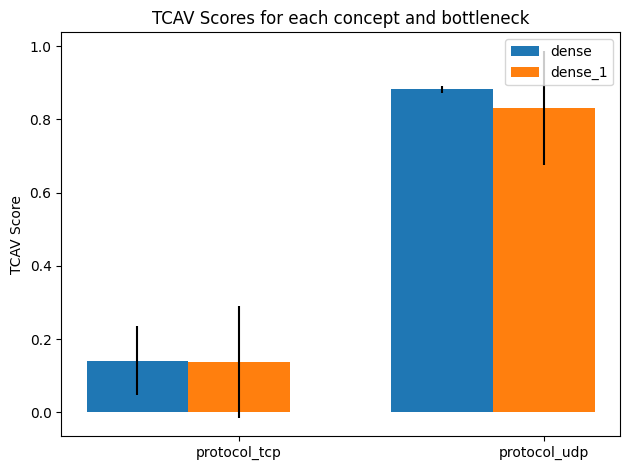

Class = Generic
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.88 (+- 0.29), random was 0.46 (+- 0.46). p-val = 0.006 (significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.48 (+- 0.50). p-val = 0.012 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.46). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.12 (+- 0.29), random was 0.48 (+- 0.50). p-val = 0.028 (significant)
{'dense': {'bn_vals': [0.884, 0.0], 'bn_stds': [0.2885810111563129, 0.0], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.8939999999999999, 0.11749999999999998], 'bn_stds': [0.29813419797131624, 0.29429789329861], 'significant': [True, True]}}


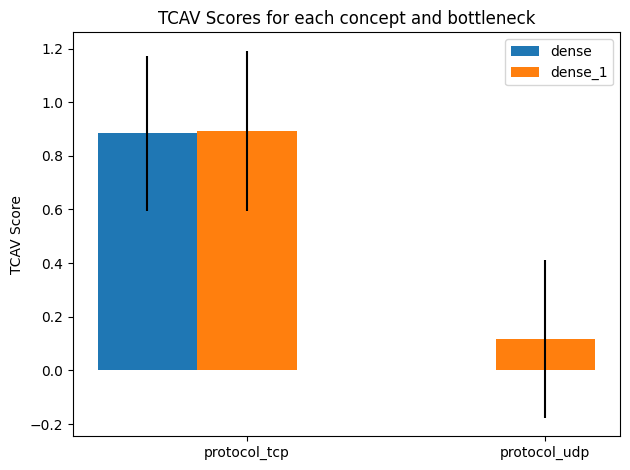

Class = Exploits
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.80 (+- 0.23), random was 0.47 (+- 0.36). p-val = 0.007 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.01), random was 0.46 (+- 0.48). p-val = 0.001 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.06 (+- 0.06), random was 0.47 (+- 0.36). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.46 (+- 0.48). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.796, 0.06000000000000001], 'bn_stds': [0.23020425712831638, 0.06496152707564685], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.99, 0.009000000000000001], 'bn_stds': [0.010000000000000009, 0.009165151389911681], 'significant': [True, True]}}


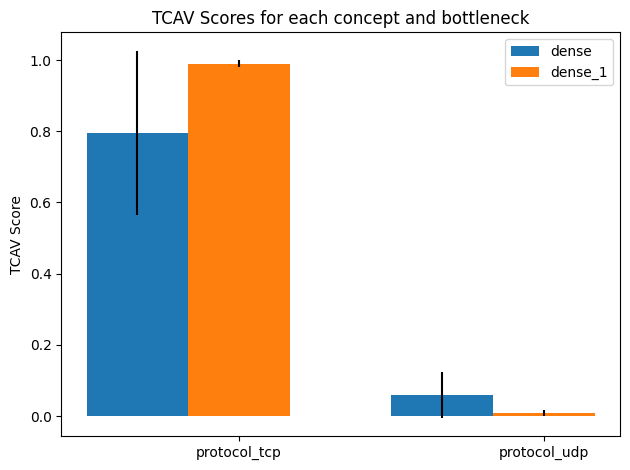

Class = Fuzzers
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.80 (+- 0.24), random was 0.47 (+- 0.39). p-val = 0.010 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.00), random was 0.46 (+- 0.47). p-val = 0.001 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.05 (+- 0.06), random was 0.47 (+- 0.39). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.02 (+- 0.01), random was 0.46 (+- 0.47). p-val = 0.004 (significant)
{'dense': {'bn_vals': [0.8019999999999999, 0.046], 'bn_stds': [0.23941804443274525, 0.06280127387243033], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.9924999999999999, 0.015000000000000003], 'bn_stds': [0.004031128874149279, 0.007071067811865476], 'significant': [True, True]}}


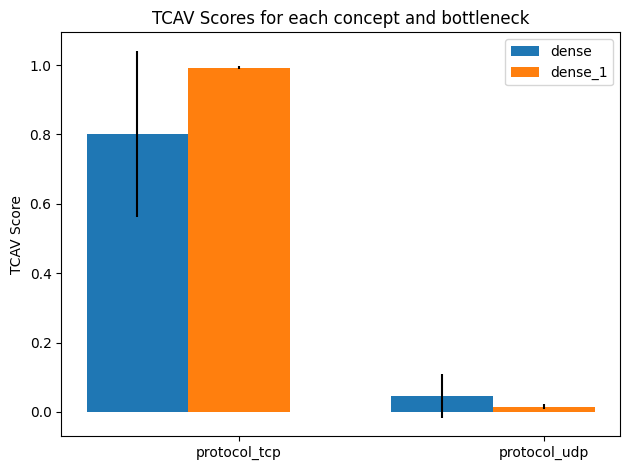

Class = DoS
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.69 (+- 0.29), random was 0.48 (+- 0.38). p-val = 0.110 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.97 (+- 0.02), random was 0.44 (+- 0.47). p-val = 0.001 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.13 (+- 0.05), random was 0.48 (+- 0.38). p-val = 0.005 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.44 (+- 0.47). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.01, 0.134], 'bn_stds': [0, 0.046249324319388704], 'significant': [False, True]}, 'dense_1': {'bn_vals': [0.9705, 0.0055], 'bn_stds': [0.024129857024027333, 0.014908051515875572], 'significant': [True, True]}}


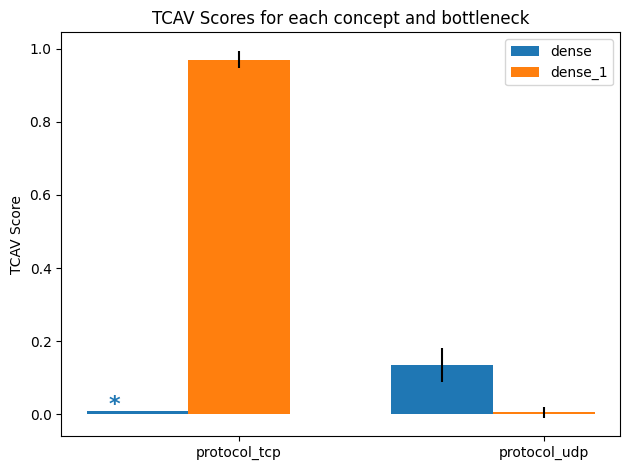

Class = Reconnaissance
  Concept = protocol_tcp
    Bottleneck = dense. TCAV Score = 0.86 (+- 0.25), random was 0.46 (+- 0.41). p-val = 0.003 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.45 (+- 0.49). p-val = 0.001 (significant)
  Concept = protocol_udp
    Bottleneck = dense. TCAV Score = 0.02 (+- 0.02), random was 0.46 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.45 (+- 0.49). p-val = 0.005 (significant)
{'dense': {'bn_vals': [0.8560000000000001, 0.0185], 'bn_stds': [0.24681774652564997, 0.016132265804901676], 'significant': [True, True]}, 'dense_1': {'bn_vals': [0.999, 0.004999999999999999], 'bn_stds': [0.0020000000000000018, 8.673617379884035e-19], 'significant': [True, True]}}


/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


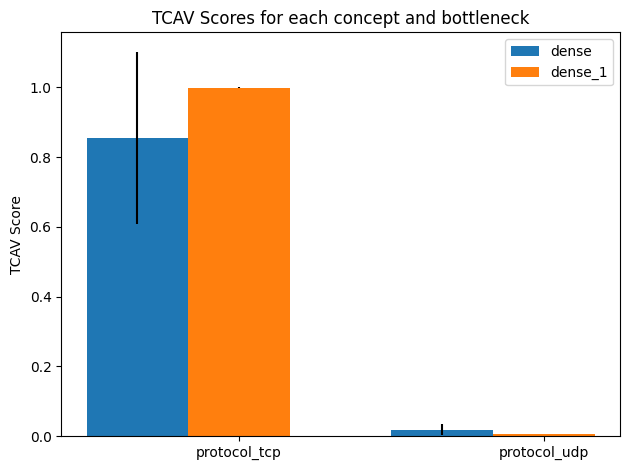

In [61]:
#6 TCAV EXPLAINABILITY
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissanc
#Target traffic type
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"
#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_protocol=["protocol_tcp", "protocol_udp"]
concepts=concepts_protocol
#Level of statistical tests to be performed
alphas = [0.1]

#files (CAV:  measure the sensitivity if a given bottleneck to a given concept)
#are stored in cav_dir
my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()


utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Class = Normal
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.05), random was 0.49 (+- 0.30). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.06 (+- 0.07), random was 0.44 (+- 0.41). p-val = 0.004 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.48 (+- 0.28), random was 0.49 (+- 0.30). p-val = 0.896 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.27 (+- 0.28), random was 0.44 (+- 0.41). p-val = 0.185 (not significant)
{'dense': {'bn_vals': [0.10200000000000001, 0.01], 'bn_stds': [0.045398237851264664, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.05900000000000001, 0.01], 'bn_stds': [0.06818357573492315, 0], 'significant': [True, False]}}


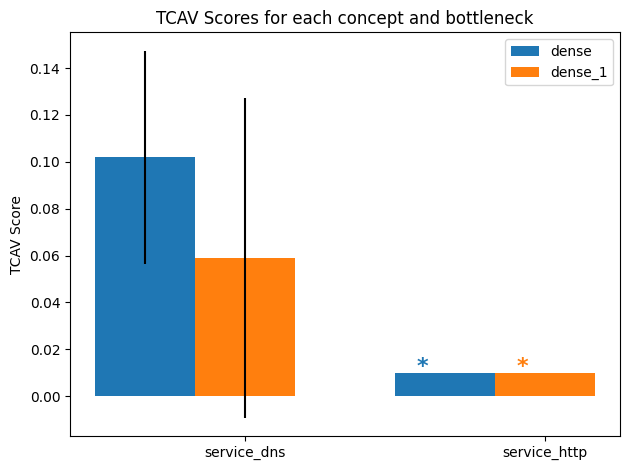

Class = Generic
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.02 (+- 0.00), random was 0.50 (+- 0.48). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.36), random was 0.45 (+- 0.49). p-val = 0.116 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.65 (+- 0.43), random was 0.50 (+- 0.48). p-val = 0.353 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.28 (+- 0.43), random was 0.45 (+- 0.49). p-val = 0.294 (not significant)
{'dense': {'bn_vals': [0.018, 0.01], 'bn_stds': [0.004, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.01, 0.01], 'bn_stds': [0, 0], 'significant': [False, False]}}


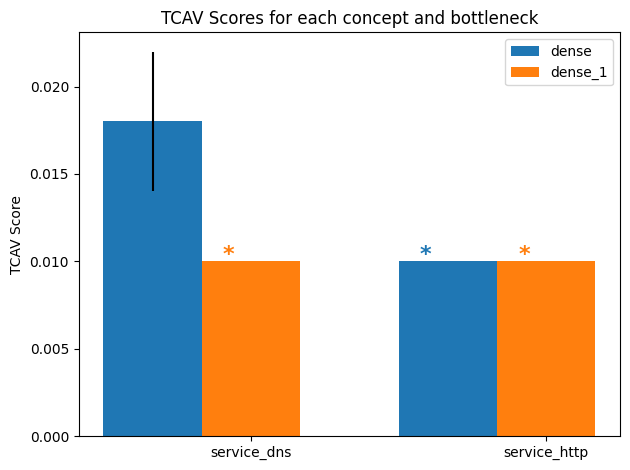

Class = Exploits
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.94 (+- 0.01), random was 0.51 (+- 0.28). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.97 (+- 0.08), random was 0.54 (+- 0.43). p-val = 0.003 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.64 (+- 0.20), random was 0.51 (+- 0.28). p-val = 0.141 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.64 (+- 0.43), random was 0.54 (+- 0.43). p-val = 0.503 (not significant)
{'dense': {'bn_vals': [0.9430000000000002, 0.01], 'bn_stds': [0.013820274961085227, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.9719999999999999, 0.01], 'bn_stds': [0.084, 0], 'significant': [True, False]}}


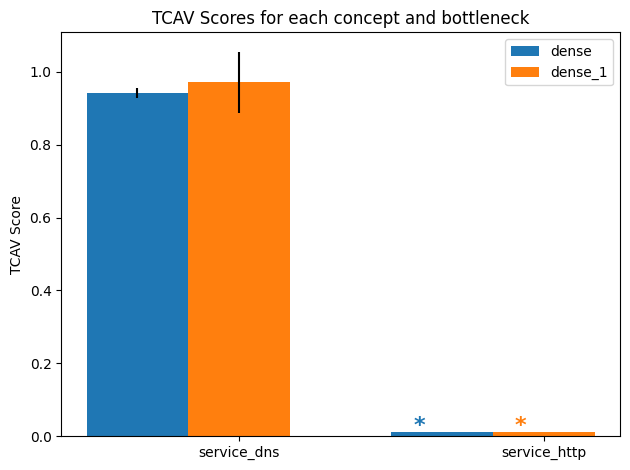

Class = Fuzzers
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.74 (+- 0.10), random was 0.49 (+- 0.30). p-val = 0.010 (significant)
    Bottleneck = dense_1. TCAV Score = 0.77 (+- 0.20), random was 0.55 (+- 0.44). p-val = 0.124 (not significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.61 (+- 0.21), random was 0.49 (+- 0.30). p-val = 0.223 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.55 (+- 0.44). p-val = 0.021 (significant)
{'dense': {'bn_vals': [0.7394999999999999, 0.01], 'bn_stds': [0.09503815023452426, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.01, 0.89], 'bn_stds': [0, 0.29632752150281283], 'significant': [False, True]}}


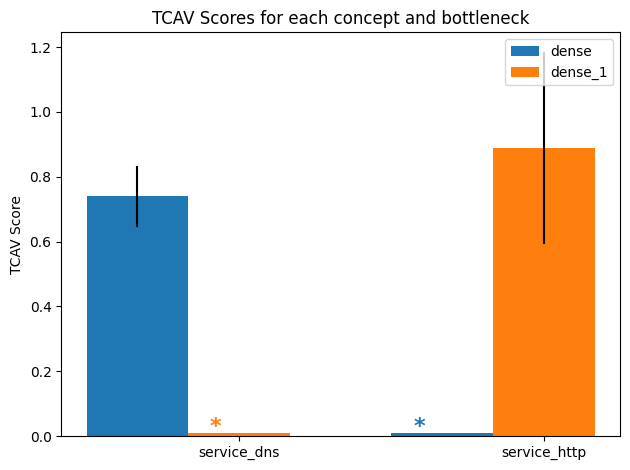

Class = DoS
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.01), random was 0.51 (+- 0.35). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.01), random was 0.54 (+- 0.42). p-val = 0.001 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.47 (+- 0.35), random was 0.51 (+- 0.35). p-val = 0.711 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.75 (+- 0.29), random was 0.54 (+- 0.42). p-val = 0.130 (not significant)
{'dense': {'bn_vals': [0.9919999999999998, 0.01], 'bn_stds': [0.007483314773547889, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.9919999999999998, 0.01], 'bn_stds': [0.009000000000000008, 0], 'significant': [True, False]}}


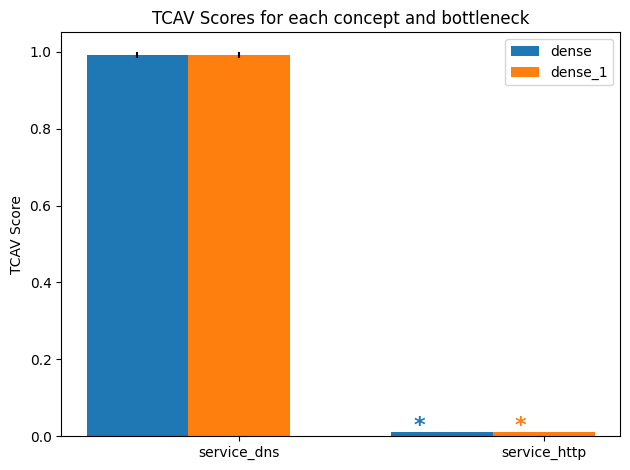

Class = Reconnaissance
  Concept = service_dns
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.02), random was 0.49 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.93 (+- 0.16), random was 0.54 (+- 0.39). p-val = 0.003 (significant)
  Concept = service_http
    Bottleneck = dense. TCAV Score = 0.52 (+- 0.31), random was 0.49 (+- 0.33). p-val = 0.823 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.72 (+- 0.37), random was 0.54 (+- 0.39). p-val = 0.169 (not significant)
{'dense': {'bn_vals': [0.99, 0.01], 'bn_stds': [0.02291287847477919, 0], 'significant': [True, False]}, 'dense_1': {'bn_vals': [0.9324999999999999, 0.01], 'bn_stds': [0.1575, 0], 'significant': [True, False]}}


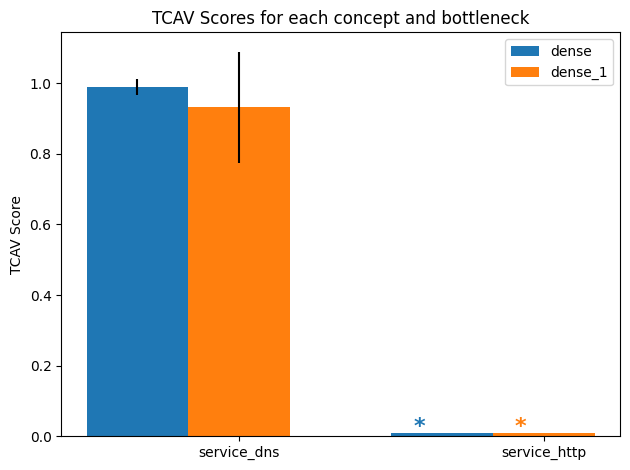

In [62]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Target traffic type
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_service=["service_dns",  "service_http"]
concepts=concepts_service
#Level of statistical tests to be performed
alphas = [0.1]



my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Class = Normal
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.20 (+- 0.16), random was 0.54 (+- 0.33). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.13 (+- 0.14), random was 0.54 (+- 0.38). p-val = 0.001 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.54 (+- 0.23), random was 0.54 (+- 0.33). p-val = 0.983 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.71 (+- 0.35), random was 0.54 (+- 0.38). p-val = 0.198 (not significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.20 (+- 0.05), random was 0.54 (+- 0.33). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.03), random was 0.54 (+- 0.38). p-val = 0.000 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 1.00 (+- 0.00), random was 0.54 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.03), random was 0.54 (+- 0.38). p-val = 0.000 (significant)
{'dense': {'bn_va

/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


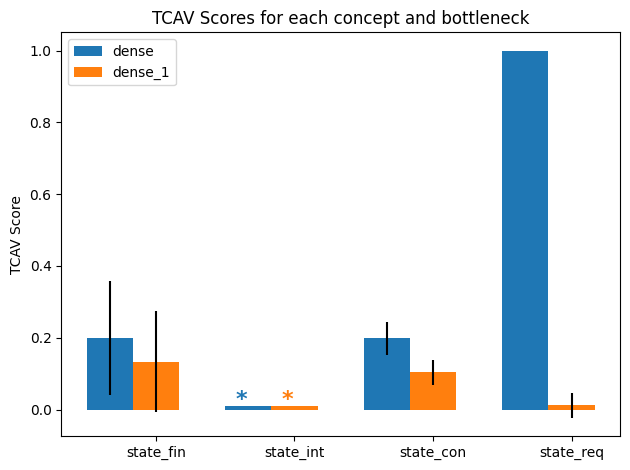

Class = Generic
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.94 (+- 0.13), random was 0.46 (+- 0.46). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.30), random was 0.48 (+- 0.50). p-val = 0.012 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.55 (+- 0.36), random was 0.46 (+- 0.46). p-val = 0.537 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.21 (+- 0.39), random was 0.48 (+- 0.50). p-val = 0.110 (not significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.78 (+- 0.00), random was 0.46 (+- 0.46). p-val = 0.032 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.48 (+- 0.50). p-val = 0.002 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.46). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.48 (+- 0.50). p-val = 0.001 (significant)
{'dense': {'bn_v

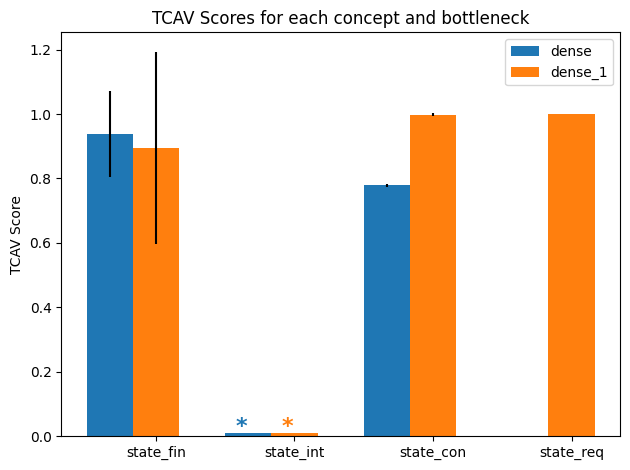

Class = Exploits
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.79 (+- 0.31), random was 0.47 (+- 0.36). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.01), random was 0.46 (+- 0.48). p-val = 0.001 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.33 (+- 0.19), random was 0.47 (+- 0.36). p-val = 0.244 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.20 (+- 0.38), random was 0.46 (+- 0.48). p-val = 0.103 (not significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.01), random was 0.47 (+- 0.36). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.01), random was 0.46 (+- 0.48). p-val = 0.001 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.00), random was 0.47 (+- 0.36). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.97 (+- 0.02), random was 0.46 (+- 0.48). p-val = 0.001 (significant)
{'dense': {'bn_

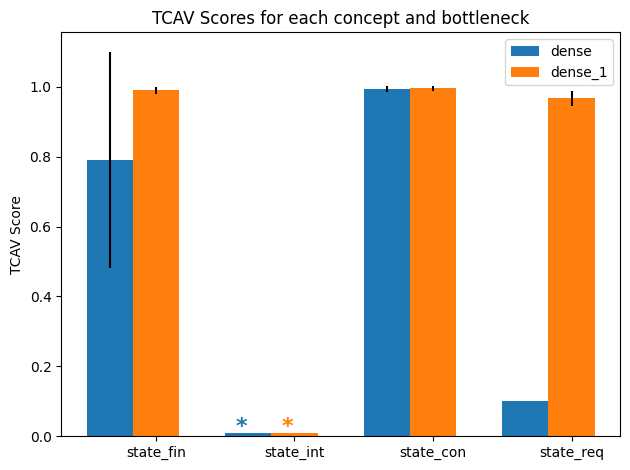

Class = Fuzzers
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.83 (+- 0.25), random was 0.47 (+- 0.39). p-val = 0.005 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.00), random was 0.46 (+- 0.47). p-val = 0.001 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.30 (+- 0.17), random was 0.47 (+- 0.39). p-val = 0.175 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.15 (+- 0.30), random was 0.46 (+- 0.47). p-val = 0.050 (not significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.94 (+- 0.05), random was 0.47 (+- 0.39). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.00), random was 0.46 (+- 0.47). p-val = 0.001 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.06 (+- 0.00), random was 0.47 (+- 0.39). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.88 (+- 0.29), random was 0.46 (+- 0.47). p-val = 0.007 (significant)
{'dense': {'bn_v

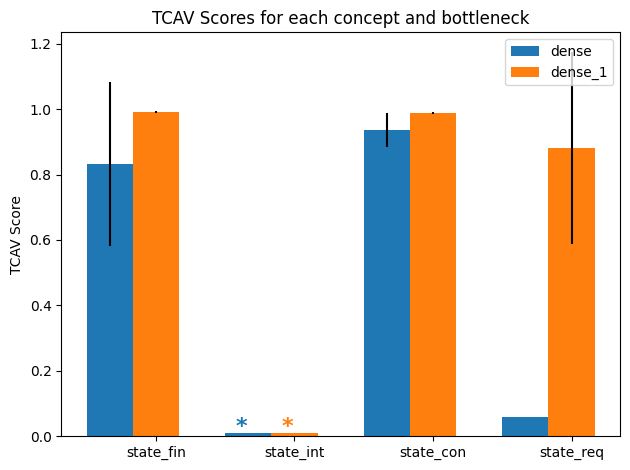

Class = DoS
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.72 (+- 0.35), random was 0.48 (+- 0.38). p-val = 0.069 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.02), random was 0.44 (+- 0.47). p-val = 0.000 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.58 (+- 0.29), random was 0.48 (+- 0.38). p-val = 0.459 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.37), random was 0.44 (+- 0.47). p-val = 0.104 (not significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.99 (+- 0.01), random was 0.48 (+- 0.38). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.44 (+- 0.47). p-val = 0.000 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.16 (+- 0.01), random was 0.48 (+- 0.38). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.44 (+- 0.47). p-val = 0.000 (significant)
{'dense': {'bn_v

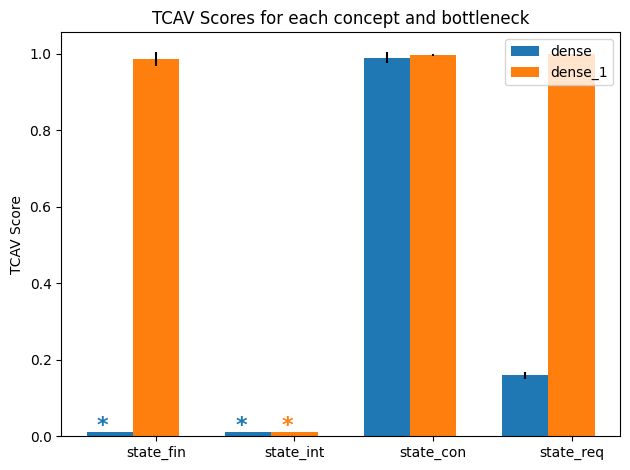

Class = Reconnaissance
  Concept = state_fin
    Bottleneck = dense. TCAV Score = 0.79 (+- 0.32), random was 0.46 (+- 0.41). p-val = 0.015 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.45 (+- 0.49). p-val = 0.001 (significant)
  Concept = state_int
    Bottleneck = dense. TCAV Score = 0.33 (+- 0.23), random was 0.46 (+- 0.41). p-val = 0.354 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.38), random was 0.45 (+- 0.49). p-val = 0.115 (not significant)
  Concept = state_con
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.08), random was 0.46 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.01), random was 0.45 (+- 0.49). p-val = 0.001 (significant)
  Concept = state_req
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.87 (+- 0.29), random was 0.45 (+- 0.49). p-val = 0.009 (significant)
{'dense':

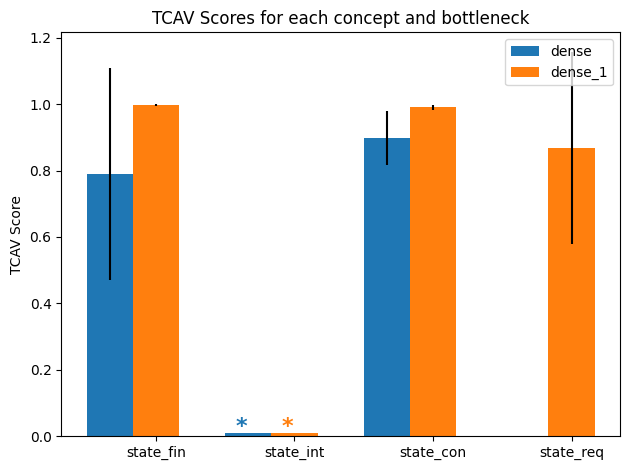

In [63]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance
#Target traffic type
target1_state = "Normal"
target2_state = "Generic"
target3_state = "Exploits"
target4_state = "Fuzzers"
target5_state = "DoS"
target6_state = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_state=["state_fin",  "state_int", "state_con", "state_req"]
concepts=concepts_state
#Level of statistical tests to be performed
alphas = [0.1]



my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

Class = Normal
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.89 (+- 0.00), random was 0.54 (+- 0.33). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.83 (+- 0.16), random was 0.54 (+- 0.38). p-val = 0.020 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.40 (+- 0.25), random was 0.54 (+- 0.33). p-val = 0.201 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.40 (+- 0.36), random was 0.54 (+- 0.38). p-val = 0.250 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.13 (+- 0.06), random was 0.54 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.08 (+- 0.05), random was 0.54 (+- 0.38). p-val = 0.000 (significant)
{'dense': {'bn_vals': [0.885, 0.01, 0.12999999999999998], 'bn_stds': [0.0, 0, 0.0606630035524124], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.833, 0.01, 0.0805], 'bn_stds': [0.156, 0, 0.052699620491992165], 'significant': [True, False,

/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


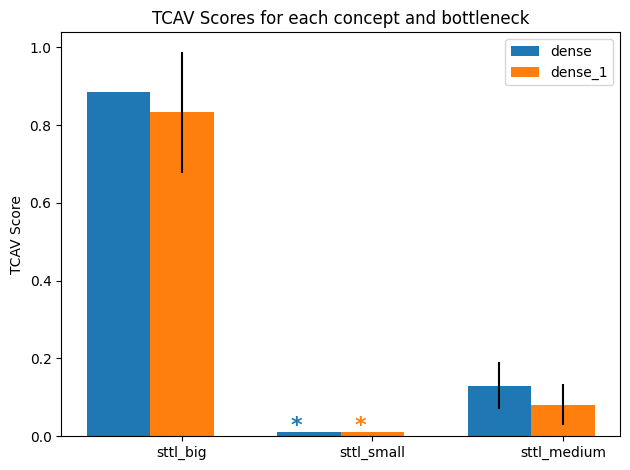

Class = Generic
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.00 (+- 0.00), random was 0.46 (+- 0.46). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.11 (+- 0.30), random was 0.48 (+- 0.50). p-val = 0.026 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.35), random was 0.46 (+- 0.46). p-val = 0.043 (significant)
    Bottleneck = dense_1. TCAV Score = 0.60 (+- 0.49), random was 0.48 (+- 0.50). p-val = 0.475 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.86 (+- 0.31), random was 0.46 (+- 0.46). p-val = 0.009 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.48 (+- 0.50). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.0, 0.7695000000000001, 0.8625], 'bn_stds': [0.0, 0.34719915034458254, 0.30549345328500904], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.11399999999999999, 0.01, 0.9984999999999999], 'bn_stds': [0.2953624891552751, 0

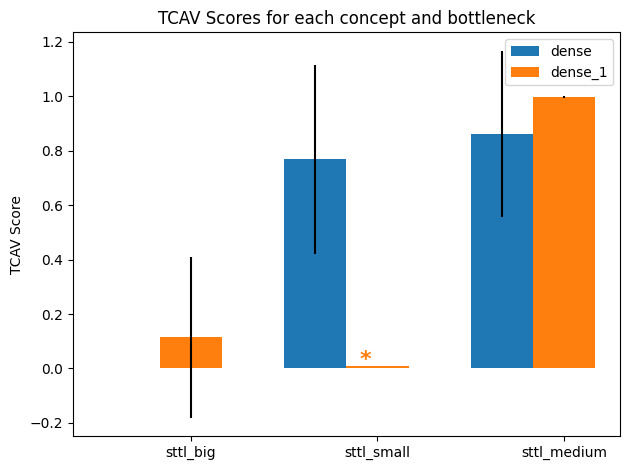

Class = Exploits
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.02 (+- 0.02), random was 0.47 (+- 0.36). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.01), random was 0.46 (+- 0.48). p-val = 0.004 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.53 (+- 0.22), random was 0.47 (+- 0.36). p-val = 0.618 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.80 (+- 0.39), random was 0.46 (+- 0.48). p-val = 0.034 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.89 (+- 0.18), random was 0.47 (+- 0.36). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 1.00 (+- 0.00), random was 0.46 (+- 0.48). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.023, 0.01, 0.8925000000000001], 'bn_stds': [0.023259406699226014, 0, 0.17842715600490863], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.004, 0.8025, 1.0], 'bn_stds': [0.008, 0.3853521117108352, 0.0], 'significant':

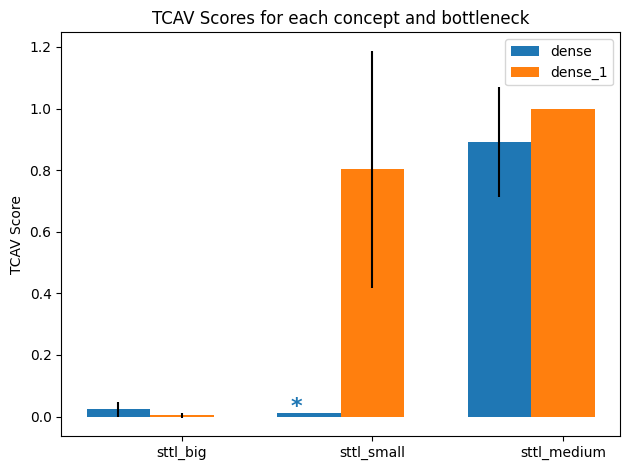

Class = Fuzzers
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.02 (+- 0.00), random was 0.47 (+- 0.39). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.02 (+- 0.01), random was 0.46 (+- 0.47). p-val = 0.004 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.48 (+- 0.29), random was 0.47 (+- 0.39). p-val = 0.919 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.51 (+- 0.48), random was 0.46 (+- 0.47). p-val = 0.765 (not significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.90 (+- 0.14), random was 0.47 (+- 0.39). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.00), random was 0.46 (+- 0.47). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.0185, 0.01, 0.9029999999999999], 'bn_stds': [0.003201562118716425, 0, 0.14043147795277242], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.016, 0.01, 0.9860000000000001], 'bn_stds': [0.009433981132056605, 0, 0.004

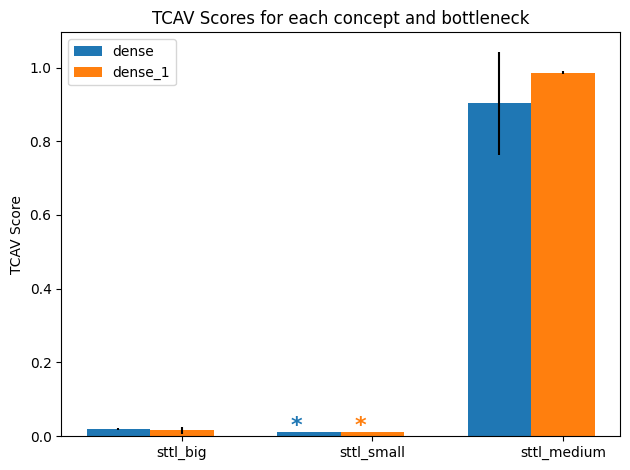

Class = DoS
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.10 (+- 0.03), random was 0.48 (+- 0.38). p-val = 0.002 (significant)
    Bottleneck = dense_1. TCAV Score = 0.01 (+- 0.01), random was 0.44 (+- 0.47). p-val = 0.005 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.74 (+- 0.21), random was 0.48 (+- 0.38). p-val = 0.045 (significant)
    Bottleneck = dense_1. TCAV Score = 0.79 (+- 0.36), random was 0.44 (+- 0.47). p-val = 0.028 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.33), random was 0.48 (+- 0.38). p-val = 0.028 (significant)
    Bottleneck = dense_1. TCAV Score = 0.95 (+- 0.04), random was 0.44 (+- 0.47). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.099, 0.7354999999999999, 0.7665000000000001], 'bn_stds': [0.030066592756745815, 0.21186611338295702, 0.3250926790932087], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.005, 0.7905, 0.9454999999999998], 'bn_stds': [0.015, 0.36

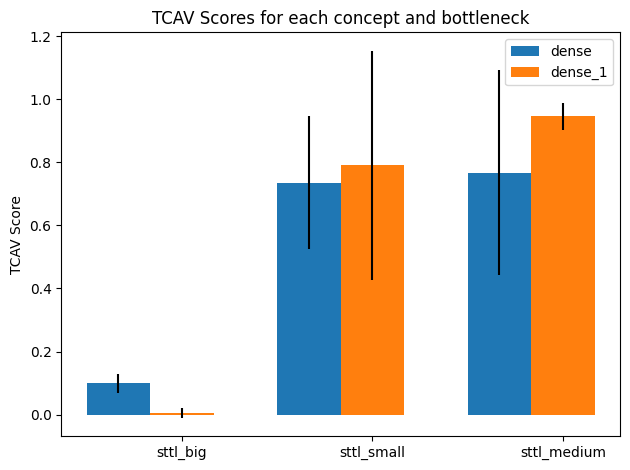

Class = Reconnaissance
  Concept = sttl_big
    Bottleneck = dense. TCAV Score = 0.01 (+- 0.00), random was 0.46 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.00 (+- 0.00), random was 0.45 (+- 0.49). p-val = 0.005 (significant)
  Concept = sttl_small
    Bottleneck = dense. TCAV Score = 0.69 (+- 0.20), random was 0.46 (+- 0.41). p-val = 0.079 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.80 (+- 0.38), random was 0.45 (+- 0.49). p-val = 0.029 (significant)
  Concept = sttl_medium
    Bottleneck = dense. TCAV Score = 0.93 (+- 0.13), random was 0.46 (+- 0.41). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.99 (+- 0.02), random was 0.45 (+- 0.49). p-val = 0.001 (significant)
{'dense': {'bn_vals': [0.0075, 0.01, 0.9305], 'bn_stds': [0.004031128874149276, 0, 0.13491571442941702], 'significant': [True, False, True]}, 'dense_1': {'bn_vals': [0.004999999999999999, 0.8045, 0.9870000000000001], 'bn_stds': [8.673617379884035e-19,

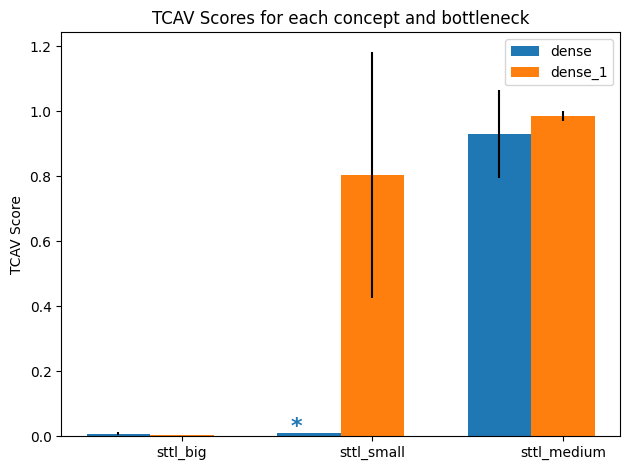

In [64]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance
#Target traffic type
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_sttl=["sttl_big",  "sttl_small", "sttl_medium"]
concepts=concepts_sttl
#Level of statistical tests to be performed
alphas = [0.1]

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)

Class = Normal
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.39 (+- 0.00), random was 0.54 (+- 0.33). p-val = 0.152 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.81 (+- 0.23), random was 0.54 (+- 0.38). p-val = 0.036 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.13 (+- 0.09), random was 0.54 (+- 0.33). p-val = 0.000 (significant)
    Bottleneck = dense_1. TCAV Score = 0.19 (+- 0.23), random was 0.54 (+- 0.38). p-val = 0.006 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.49 (+- 0.22), random was 0.54 (+- 0.33). p-val = 0.631 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.25 (+- 0.27), random was 0.54 (+- 0.38). p-val = 0.023 (significant)
{'dense': {'bn_vals': [0.01, 0.1275, 0.01], 'bn_stds': [0, 0.09000694417654674, 0], 'significant': [False, True, False]}, 'dense_1': {'bn_vals': [0.807, 0.192, 0.2545], 'bn_stds': [0.23068593368473944, 0.231, 0.27024479643464], 'significant': [True, True, 

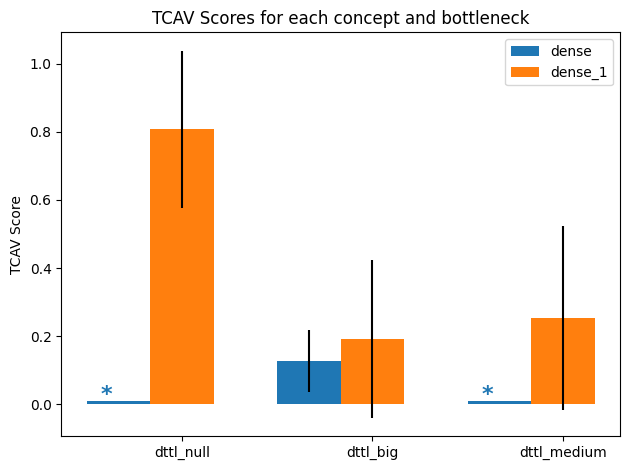

Class = Generic
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.79 (+- 0.00), random was 0.46 (+- 0.46). p-val = 0.026 (significant)
    Bottleneck = dense_1. TCAV Score = 0.12 (+- 0.29), random was 0.48 (+- 0.50). p-val = 0.027 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.88 (+- 0.30), random was 0.46 (+- 0.46). p-val = 0.006 (significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.30), random was 0.48 (+- 0.50). p-val = 0.012 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.39), random was 0.46 (+- 0.46). p-val = 0.046 (significant)
    Bottleneck = dense_1. TCAV Score = 0.80 (+- 0.40), random was 0.48 (+- 0.50). p-val = 0.054 (not significant)
{'dense': {'bn_vals': [0.79, 0.8795, 0.7675], 'bn_stds': [0.0, 0.2968370765251538, 0.38789334874421344], 'significant': [True, True, True]}, 'dense_1': {'bn_vals': [0.1165, 0.8960000000000001, 0.01], 'bn_stds': [0.29466124617940515, 0.298770815174441, 0], 'si

/usr/local/lib/python3.10/dist-packages/tcav/utils_plot.py:96: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_val = ttest_ind(random_i_ups[bottleneck], i_ups)


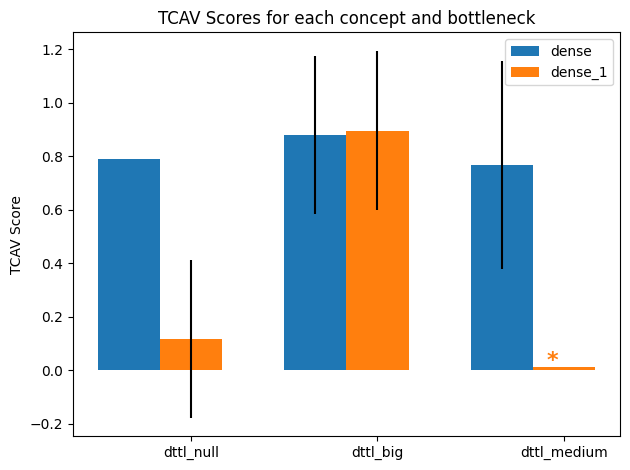

Class = Exploits
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.45 (+- 0.01), random was 0.47 (+- 0.36). p-val = 0.881 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.29), random was 0.46 (+- 0.48). p-val = 0.026 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.86 (+- 0.22), random was 0.47 (+- 0.36). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.46 (+- 0.48). p-val = 0.007 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.47 (+- 0.29), random was 0.47 (+- 0.36). p-val = 0.998 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.80 (+- 0.39), random was 0.46 (+- 0.48). p-val = 0.035 (significant)
{'dense': {'bn_vals': [0.01, 0.8625, 0.01], 'bn_stds': [0, 0.2223651276616907, 0], 'significant': [False, True, False]}, 'dense_1': {'bn_vals': [0.10299999999999998, 0.892, 0.8004999999999999], 'bn_stds': [0.29243118848713795, 0.2974827726104488, 0.38783

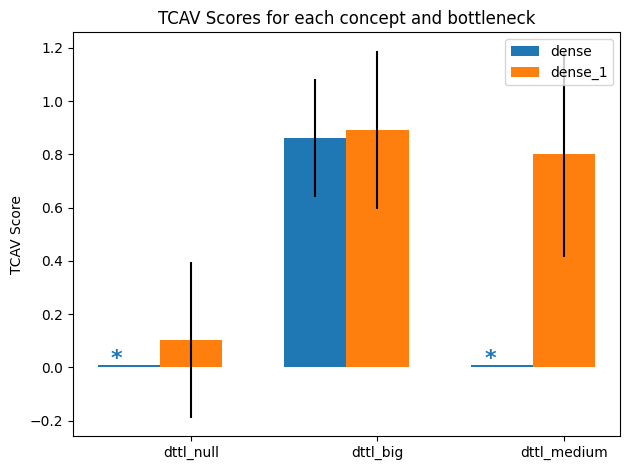

Class = Fuzzers
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.41 (+- 0.00), random was 0.47 (+- 0.39). p-val = 0.634 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.11 (+- 0.29), random was 0.46 (+- 0.47). p-val = 0.028 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.88 (+- 0.20), random was 0.47 (+- 0.39). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.29), random was 0.46 (+- 0.47). p-val = 0.006 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.47 (+- 0.33), random was 0.47 (+- 0.39). p-val = 0.984 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.69 (+- 0.45), random was 0.46 (+- 0.47). p-val = 0.152 (not significant)
{'dense': {'bn_vals': [0.01, 0.8815, 0.01], 'bn_stds': [0, 0.20264562664908414, 0], 'significant': [False, True, False]}, 'dense_1': {'bn_vals': [0.11100000000000002, 0.892, 0.01], 'bn_stds': [0.2913914892374175, 0.2923371341448089, 0], 'significant':

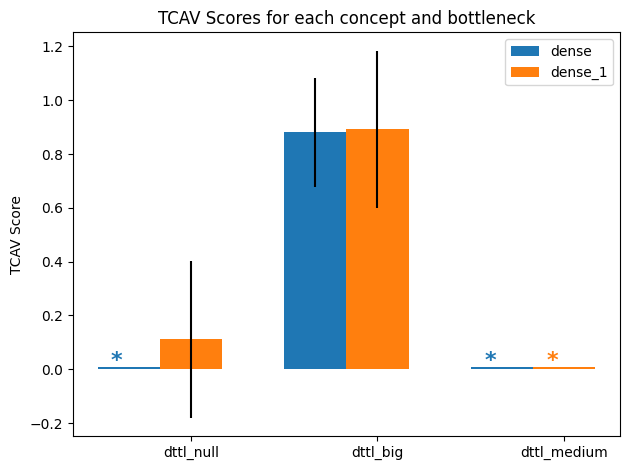

Class = DoS
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.77 (+- 0.01), random was 0.48 (+- 0.38). p-val = 0.023 (significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.44 (+- 0.47). p-val = 0.029 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.80 (+- 0.26), random was 0.48 (+- 0.38). p-val = 0.013 (significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.28), random was 0.44 (+- 0.47). p-val = 0.005 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.65 (+- 0.31), random was 0.48 (+- 0.38). p-val = 0.192 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.78 (+- 0.39), random was 0.44 (+- 0.47). p-val = 0.034 (significant)
{'dense': {'bn_vals': [0.765, 0.799, 0.01], 'bn_stds': [0.01072380529476362, 0.26291443475016735, 0], 'significant': [True, True, False]}, 'dense_1': {'bn_vals': [0.10049999999999999, 0.8865000000000001, 0.7795], 'bn_stds': [0.2998370390728937, 0.2796162548923077

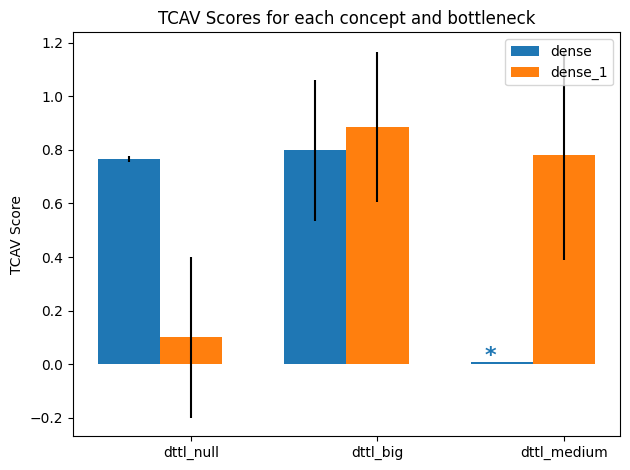

Class = Reconnaissance
  Concept = dttl_null
    Bottleneck = dense. TCAV Score = 0.42 (+- 0.10), random was 0.46 (+- 0.41). p-val = 0.770 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.10 (+- 0.30), random was 0.45 (+- 0.49). p-val = 0.032 (significant)
  Concept = dttl_big
    Bottleneck = dense. TCAV Score = 0.91 (+- 0.18), random was 0.46 (+- 0.41). p-val = 0.001 (significant)
    Bottleneck = dense_1. TCAV Score = 0.90 (+- 0.30), random was 0.45 (+- 0.49). p-val = 0.006 (significant)
  Concept = dttl_medium
    Bottleneck = dense. TCAV Score = 0.51 (+- 0.34), random was 0.46 (+- 0.41). p-val = 0.672 (not significant)
    Bottleneck = dense_1. TCAV Score = 0.89 (+- 0.30), random was 0.45 (+- 0.49). p-val = 0.006 (significant)
{'dense': {'bn_vals': [0.01, 0.9105000000000001, 0.01], 'bn_stds': [0, 0.17935230692689738, 0], 'significant': [False, True, False]}, 'dense_1': {'bn_vals': [0.10399999999999998, 0.8975, 0.889], 'bn_stds': [0.297, 0.29917595157365173, 0.29701683453

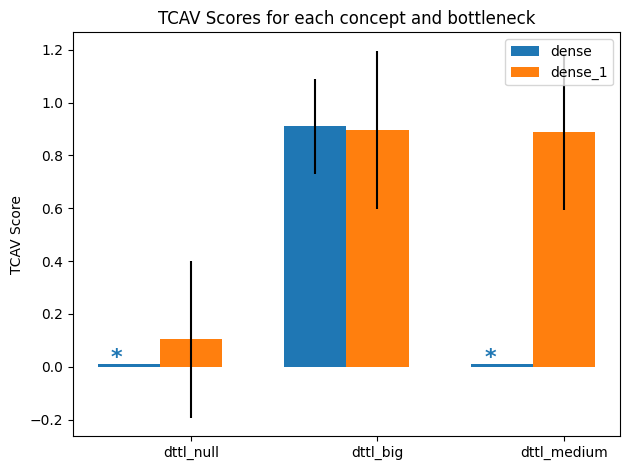

In [65]:
from tcav.utils import create_session
import tcav.utils_plot as utils_plot # utils_plot requires matplotlib
from tcav.tcav import TCAV
import absl
absl.logging.set_verbosity(0)

#Normal, Generic, Exploits, Fuzzers, DoS, Reconnaissance
target1 = "Normal"
target2 = "Generic"
target3 = "Exploits"
target4 = "Fuzzers"
target5 = "DoS"
target6 = "Reconnaissance"

#Different layers of the neural network
bottlenecks = ["dense", "dense_1" ]
#Evaluate the importance of the following concepts
concepts_dttl=["dttl_null",  "dttl_big", "dttl_medium"]
concepts=concepts_dttl
#Level of statistical tests to be performed
alphas = [0.1]

my_tcav1 = TCAV(create_session,
                   target1,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results1 = my_tcav1.run()

my_tcav2 = TCAV(create_session,
                   target2,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results2 = my_tcav2.run()

my_tcav3 = TCAV(create_session,
                   target3,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results3 = my_tcav3.run()

my_tcav4 = TCAV(create_session,
                   target4,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results4 = my_tcav4.run()

my_tcav5 = TCAV(create_session,
                   target5,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results5 = my_tcav5.run()

my_tcav6 = TCAV(create_session,
                   target6,
                   concepts,
                   bottlenecks,
                   act_gen,
                   alphas,
                   cav_dir=cav_dir,
                   num_random_exp=10)

results6 = my_tcav6.run()

utils_plot.plot_results(results1, num_random_exp=10)
utils_plot.plot_results(results2, num_random_exp=10)
utils_plot.plot_results(results3, num_random_exp=10)
utils_plot.plot_results(results4, num_random_exp=10)
utils_plot.plot_results(results5, num_random_exp=10)
utils_plot.plot_results(results6, num_random_exp=10)